#First: Linear Regression using the normal equation

  $\vartheta =(X^TX)^{-1} X^Tt$ 


  > 
  $\vartheta$: Weight (coefficient) vector

  $X$: feature matrix where the first column is a column of ones representing the added bias and each other column represents the values of a certain feature.


Let’s generate some linear-looking data to test the normal equation

In [ ]:
import numpy as np
num_points= 100 
x1 = 2* np.random.rand(num_points, 1) #Create an array of the shape 100x1 and populate it with random samples from a uniform distribution over [0, 1)
gaussian_noise= np.random.randn(num_points, 1) #sampled from a normal (Gaussian) distribution of mean 0 and variance 1
theta0= 4
theta1= 3
t = theta0 + theta1 * x1 + gaussian_noise
x1[0]


array([1.13809273])

In [ ]:
x0= np.ones((num_points, 1))
X = np.c_[x0, x1] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(t)

In [ ]:
x0.shape

(100, 1)

In [ ]:
X[0:5]

array([[1.        , 1.13809273],
       [1.        , 1.61243498],
       [1.        , 1.04525055],
       [1.        , 0.90301315],
       [1.        , 0.62956529]])

In [ ]:
theta_best

array([[3.865109  ],
       [3.07655732]])

Acceptable approximation to θ_0 and θ_1, but the noise made it impossible to recover the exact parameters of the original
function. 

Now you can make predictions using θ

In [ ]:
X1_new = np.array([[0], [2]])
X_new = np.c_[np.ones((2, 1)), X1_new] # add x0 = 1 to each instance
y_predict = X_new.dot(theta_best)
y_predict

array([[ 3.865109  ],
       [10.01822364]])

Let’s plot this model’s predictions

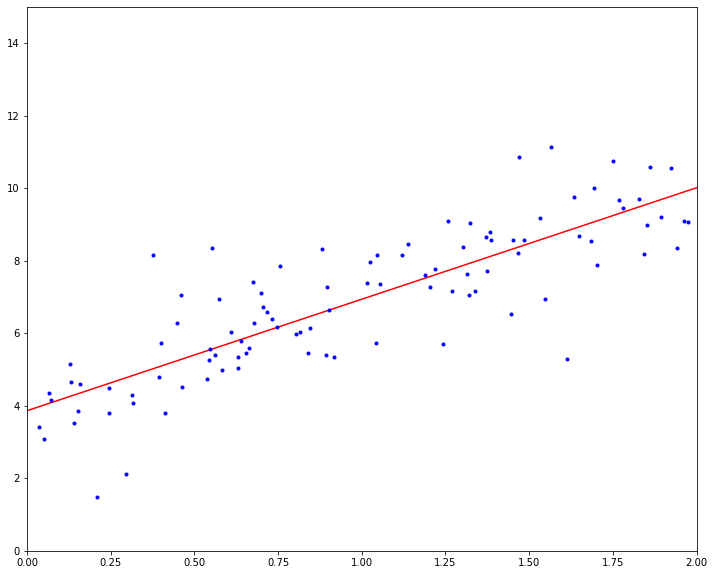

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

plt.plot(X1_new, y_predict, "r-")
plt.plot(x1, t, "b.")
plt.axis([0, 2, 0, 15]) #x axis range 0 to 2 and y axis range 0 to 15
plt.show()

#Second: linear regression using Scikit-Learn

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x1, t)
lin_reg.intercept_, lin_reg.coef_

(array([3.865109]), array([[3.07655732]]))

In [ ]:
lin_reg.predict(X1_new)

array([[ 3.865109  ],
       [10.01822364]])

#Third: Linear regression using gradient descent


#Task 1 [2 points] 

Implement batch gradient descent and get the values of theta using your implementation. 

$\vartheta= \vartheta - (2\lambda/n)X^T(y-t)$

where n is the number of examples (data points). 

In [ ]:
#Your code here
theta = np.random.randn(2,1)          # random initialization of model parameters
learn_rate = 0.01
n = num_points  

y_predicted = X.dot(theta)

for i in range(0,10000):
  theta_new = theta - ( ((2*learn_rate)/ n) *(X.T).dot(y_predicted- t))
  y_predicted = X.dot(theta_new)
  i
theta_new
#t.shape

array([[-0.98255388],
       [-1.40282396]])

#Fourth: Linear Regression using SGD with Scikit-Learn

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(x1, t.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([3.77790833]), array([2.898763]))

#Fifth: Polynomial Regression

What if your data is actually more complex than a simple straight line? Surprisingly, you can actually use a linear model to fit nonlinear data. A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features. This technique is called Polynomial Regression.

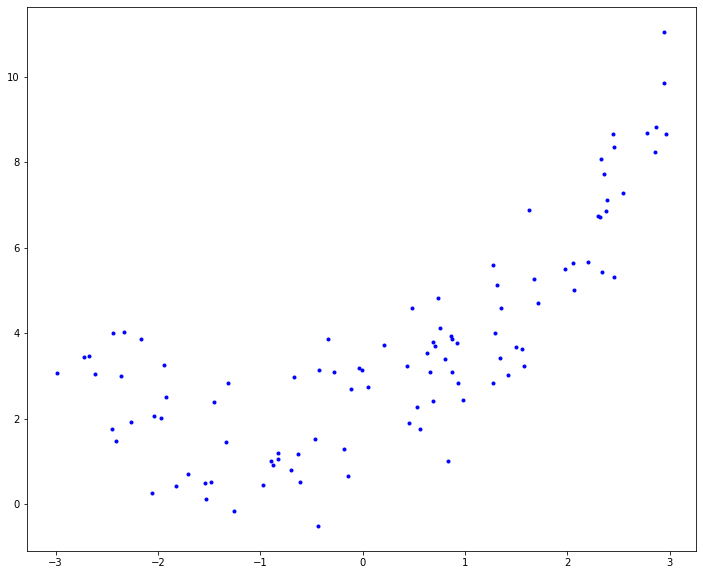

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
t = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, t, "b.")


Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s PolynomialFeatures class to transform our training data, adding the square (2nd-degree polynomial) of each feature in the training set as new features (in this case there is just one feature):

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
print('X[0]= ', X[0])
print('X_poly[0]= ', X_poly[0])

X[0]=  [0.80332677]
X_poly[0]=  [0.80332677 0.6453339 ]


X_poly now contains the original feature of X plus the square of this feature. 

Now you can fit a LinearRegression model to this extended training data

Intercept=  [2.0262699] and coefficients =  [[0.97783924 0.48572131]]
Root mean squared error=  1.051673152342621


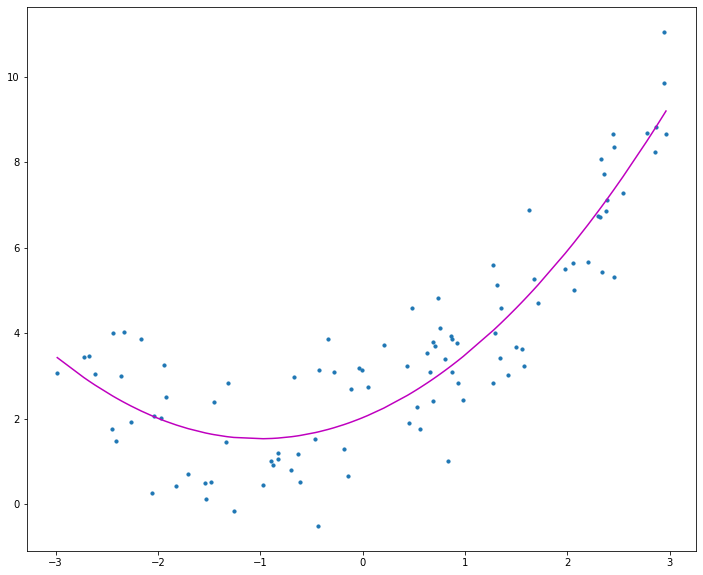

In [ ]:
from sklearn.metrics import mean_squared_error
import operator

lin_reg = LinearRegression()
lin_reg.fit(X_poly, t) #Fit the transformed features 
y_poly_pred = lin_reg.predict(X_poly)  #Letting the model predict the y values for the transformed features to measure the error
rmse = np.sqrt(mean_squared_error(t,y_poly_pred)) 
print("Intercept= ", lin_reg.intercept_,"and coefficients = " ,lin_reg.coef_)
print("Root mean squared error= ", rmse)


#Plot 
plt.scatter(X, t, s=10) 
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_poly_pred), key=sort_axis)
X_plot, y_poly_pred_plot = zip(*sorted_zip)
plt.plot(X_plot, y_poly_pred_plot, color='m')
plt.show()

Not bad: The original
function was y = 0.5 x^2 + 1.0 x + 2.0 + Gaussian noise.

In [ ]:
def poly_reg (X, t, power, i, X_test, t_test):
  poly_features = PolynomialFeatures(degree=power, include_bias=False)
  X_poly = poly_features.fit_transform(X)
  lin_reg = LinearRegression()
  lin_reg.fit(X_poly, t) #Fit the transformed features 
  y_poly_pred = lin_reg.predict(X_poly)  #Letting the model predict the y values for the transformed features to measure the error
  rmse = np.sqrt(mean_squared_error(t,y_poly_pred)) 

  #evaluate test data 
  X_poly_test = poly_features.fit_transform(X_test) #Must apply the same transformations to train and test
  y_poly_eval= lin_reg.predict(X_poly_test)
  rmse_test = np.sqrt(mean_squared_error(t_test,y_poly_eval)) 

  #Plot 
  axs[i].scatter(X, t, s=10) 
  # sort the values of x before line plot
  sort_axis = operator.itemgetter(0)
  sorted_zip = sorted(zip(X,y_poly_pred), key=sort_axis)
  X_plot, y_poly_pred_plot = zip(*sorted_zip)
  axs[i].plot(X_plot, y_poly_pred_plot, color='m')
  axs[i].set_title('Polynomial of degree: %d'%power)
  return lin_reg.intercept_, lin_reg.coef_.tolist()[0], rmse, rmse_test

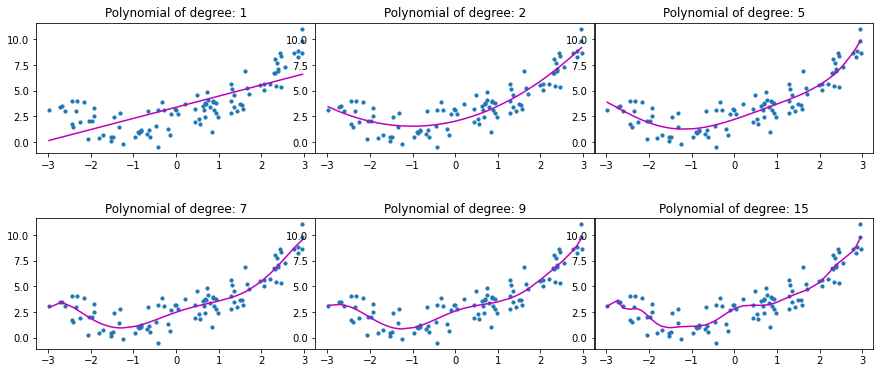

In [ ]:
fig, axs = plt.subplots(2,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

m = 20
X_test = 10*np.random.rand(m, 1)-4
t_test = 0.5 * X_test**2 + X_test + 2 + np.random.randn(m, 1)


coeff= {}
rmse= {}
rmse_test={}
powers= [1,2,5,7,9,15]
for i in range (len(powers)):
  power= powers[i]
  intercept,coeff[power],rmse[power], rmse_test[power]= poly_reg (X, t, power, i, X_test, t_test)


In [ ]:
rmse

{1: 1.646875759645912,
 2: 1.051673152342621,
 5: 1.0164995380331632,
 7: 0.9913713498723941,
 9: 0.9878000320711583,
 15: 0.9792354753787869}

In [ ]:
rmse_test

{1: 4.651364350190132,
 2: 0.768249221847756,
 5: 13.923058764083091,
 7: 30.11448266919776,
 9: 271.70152561273096,
 15: 148941.2199996366}

In [ ]:
import pandas as pd
coeff_lin_df= pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in coeff.items()]))
coeff_lin_df

,1,2,5,7,9,15
0,1.084363,0.977839,1.362948,1.436835,1.481038,2.001350
1,NaN,0.485721,0.248672,-0.372743,-0.797716,-2.706870
2,NaN,NaN,-0.171426,-0.203010,-0.248998,-1.867963
3,NaN,NaN,0.032130,0.232739,0.494904,4.030353
4,NaN,NaN,0.015125,0.016536,0.036772,1.508327
5,NaN,NaN,NaN,-0.016058,-0.066858,-2.566122
6,NaN,NaN,NaN,0.000251,-0.003260,-0.558344
7,NaN,NaN,NaN,NaN,0.003020,0.846003
8,NaN,NaN,NaN,NaN,0.000199,0.090988
9,NaN,NaN,NaN,NaN,NaN,-0.146058


#Sixth: Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
def ridge_reg (X, t, power, alpha, i, X_test, t_test):
  poly_features = PolynomialFeatures(degree=power, include_bias=False)
  X_poly = poly_features.fit_transform(X)
  ridge_reg = Ridge(alpha=alpha)
  ridge_reg.fit(X_poly, t) #Fit the transformed features 
  y_ridge_pred = ridge_reg.predict(X_poly)  #Letting the model predict the y values for the transformed features to measure the error
  rmse = np.sqrt(mean_squared_error(t,y_ridge_pred)) 

  #evaluate test data 
  X_ridge_test = poly_features.fit_transform(X_test) #Must apply the same transformations to train and test
  y_ridge_eval= ridge_reg.predict(X_ridge_test)
  rmse_test = np.sqrt(mean_squared_error(t_test,y_ridge_eval)) 


  #Plot 
  axs[i].scatter(X, t, s=10) 
  # sort the values of x before line plot
  sort_axis = operator.itemgetter(0)
  sorted_zip = sorted(zip(X,y_ridge_pred), key=sort_axis)
  X_plot, y_ridge_pred_plot = zip(*sorted_zip)
  axs[i].plot(X_plot, y_ridge_pred_plot, color='m')
  axs[i].set_title('alpha= : %.3f'%alpha)
  return ridge_reg.intercept_, ridge_reg.coef_.tolist()[0], rmse, rmse_test

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.974e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.01815e-16): result may not be accurate.
  overwrite_a=True).T


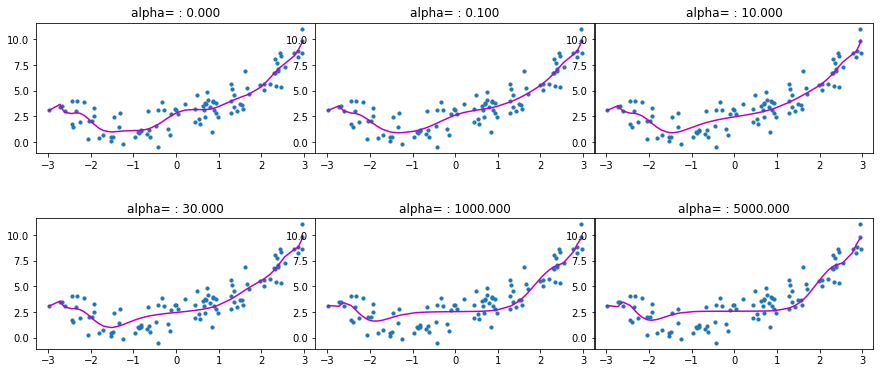

In [ ]:
fig, axs = plt.subplots(2,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

m = 20
X_test = 3*np.random.rand(m, 1)+1
t_test = 0.5 * X_test**2 + X_test + 2 + np.random.randn(m, 1)

coeff_ridge= {}
rmse_ridge= {}
rmse_ridge_test= {}
power= 15
alphas= [0,0.1,10,30, 1000, 5000]
for i in range (len(alphas)):
  alpha= alphas[i]
  intercept_ridge,coeff_ridge[alpha],rmse_ridge[alpha],rmse_ridge_test[alpha]= ridge_reg (X, t, power,alpha, i, X_test, t_test)


In [ ]:
rmse_ridge

{0: 0.9792354753787665,
 0.1: 0.9833807992815923,
 10: 1.0060525978025638,
 30: 1.0312200687623887,
 1000: 1.1801952083943081,
 5000: 1.2281711684700058}

In [ ]:
coeff_ridge_df= pd.DataFrame(dict([(k,pd.Series(v)) for k,v in coeff_ridge.items()]))
coeff_ridge_df

,0.0,0.1,10.0,30.0,1000.0,5000.0
0,2.001350,1.500204,0.666684,0.409309,0.038701,0.009467
1,-2.706870,-1.136219,-0.064580,-0.027154,0.001787,0.000884
2,-1.867962,-0.408739,0.292703,0.241261,0.042976,0.012111
3,4.030353,1.248314,-0.020995,-0.023172,0.004319,0.002203
4,1.508326,0.136513,0.080679,0.132447,0.049946,0.017199
5,-2.566122,-0.642819,-0.005011,-0.009873,0.007604,0.004253
6,-0.558343,0.039147,-0.054527,0.012866,0.038122,0.020451
7,0.846004,0.206412,0.041389,0.041538,0.008625,0.005478
8,0.090988,-0.044925,-0.010429,-0.055585,-0.010034,0.012110
9,-0.146058,-0.036511,-0.013442,-0.013139,-0.001878,-0.000052


In [ ]:
coeff_lin_df[15]

0     2.001350
1    -2.706870
2    -1.867963
3     4.030353
4     1.508327
5    -2.566122
6    -0.558344
7     0.846003
8     0.090988
9    -0.146058
10   -0.004363
11    0.012543
12   -0.000342
13   -0.000422
14    0.000030
Name: 15, dtype: float64

#Seventh: Lasso Regression

#Task 2 [2 points]
1. complete lasso_reg function to perform lasso regression and test it using the code in the below cell. [1 p]

2. How do the coefficients of lasso and ridge regression compare or the same values of alpha? [0.25 p]

3. How do the rmse values of lasso and ridge regression compare for the same values of alpha? [0.25 p]

4. Explain how lasso coefficients are used as feature selectors. [0.5 p]

as lasso uses L1 norm, it minimizes the sum of absolute values of the coefficients, so it tries to eliminate the coefficients that has a small effect (small values).

In [ ]:
from sklearn.linear_model import Lasso
def lasso_reg (X, t, power, alpha, i, X_test, t_test):
  
  #Your code here
  poly_features = PolynomialFeatures(degree=power, include_bias=False)
  X_poly = poly_features.fit_transform(X)
  lasso_reg = Lasso(alpha=alpha)
  lasso_reg.fit(X_poly, t) #Fit the transformed features 
  y_lasso_pred = lasso_reg.predict(X_poly)  #Letting the model predict the y values for the transformed features to measure the error
  rmse = np.sqrt(mean_squared_error(t,y_lasso_pred)) 

  #evaluate test data 
  X_lasso_test = poly_features.fit_transform(X_test) #Must apply the same transformations to train and test
  y_lasso_eval= lasso_reg.predict(X_lasso_test)
  rmse_test = np.sqrt(mean_squared_error(t_test,y_lasso_eval)) 


  #Plot 
  axs[i].scatter(X, t, s=10);
  # sort the values of x before line plot
  sort_axis = operator.itemgetter(0)
  sorted_zip = sorted(zip(X,y_lasso_pred), key=sort_axis)
  X_plot, y_lasso_pred_plot = zip(*sorted_zip)
  axs[i].plot(X_plot, y_lasso_pred_plot, color='m')
  axs[i].set_title('alpha= : %.3f'%alpha)

  return lasso_reg.intercept_, lasso_reg.coef_.tolist(), rmse, rmse_test


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49.001142690662235, tolerance: 0.05984441086907243
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61.09170024801009, tolerance: 0.05984441086907243
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descen

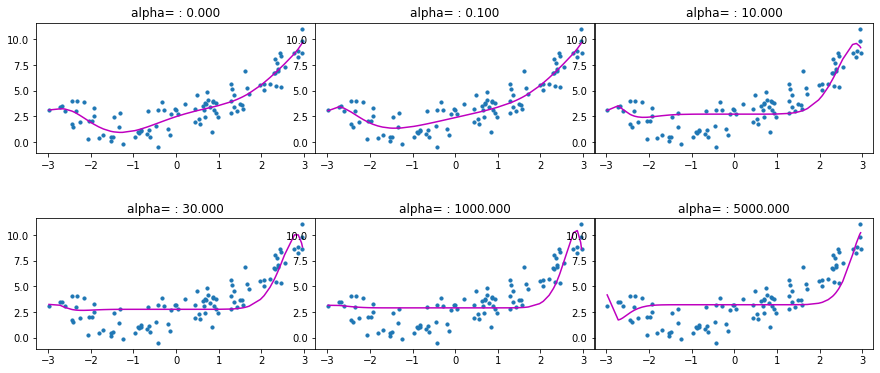

In [ ]:
fig, axs = plt.subplots(2,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

m = 20
X_test = 3*np.random.rand(m, 1)+1
t_test = 0.5 * X_test**2 + X_test + 2 + np.random.randn(m, 1)

coeff_lasso= {}
rmse_lasso= {}
rmse_lasso_test= {}
power= 15
alphas= [0,0.1,10,30, 1000, 5000]
for i in range (len(alphas)):
  alpha= alphas[i]
  intercept_lasso,coeff_lasso[alpha],rmse_lasso[alpha],rmse_lasso_test[alpha]= lasso_reg (X, t, power,alpha, i, X_test, t_test)


In [ ]:
coeff_lasso_df= pd.DataFrame(dict([(k,pd.Series(v)) for k,v in coeff_lasso.items()]))
coeff_lasso_df

,0.0,0.1,10.0,30.0,1000.0,5000.0
0,1.361822e+00,9.399329e-01,0.000000e+00,0.000000e+00,0.000000,0.000000
1,-3.690730e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
2,-1.188705e-01,5.192164e-03,0.000000e+00,0.000000e+00,0.000000,0.000000
3,2.225341e-01,6.142262e-02,0.000000e+00,0.000000e+00,0.000000,0.000000
4,-4.794152e-03,2.449775e-03,0.000000e+00,0.000000e+00,0.000000,0.000000
5,-8.253363e-03,9.624782e-03,0.000000e+00,0.000000e+00,0.000000,0.000000
6,1.321490e-03,-1.627691e-03,9.543867e-03,0.000000e+00,0.000000,0.000000
7,-1.031191e-03,-7.999033e-04,2.946227e-03,1.385331e-03,0.000000,0.000000
8,9.215339e-05,3.522729e-05,5.091828e-06,1.908852e-03,0.000000,0.000000
9,-4.382308e-05,-8.493096e-05,-8.528362e-05,2.513060e-04,0.000000,0.000000


In [ ]:
coeff_lin_df[15]

0     2.001350
1    -2.706870
2    -1.867963
3     4.030353
4     1.508327
5    -2.566122
6    -0.558344
7     0.846003
8     0.090988
9    -0.146058
10   -0.004363
11    0.012543
12   -0.000342
13   -0.000422
14    0.000030
Name: 15, dtype: float64

#Task 3 [4 points]



1. Read the data from https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/position_salaries.csv into a dataframe. **[0.5 P]**

2. Use the column "level" as your feature and "salary" as the label. **[0.5 p]** 

3. Split the data into train and test using sklearn train_test_split with test size= 0.2 **[1 P]**

4. Fit a linear regression model, a 4th degree polynomial model and a 15th degree polynomial model to the data. **[1 P]** 

5. Plot the prediction results of each model and comment on their fitting (Overfitting, underfitting, best fitting) **[1 P]**

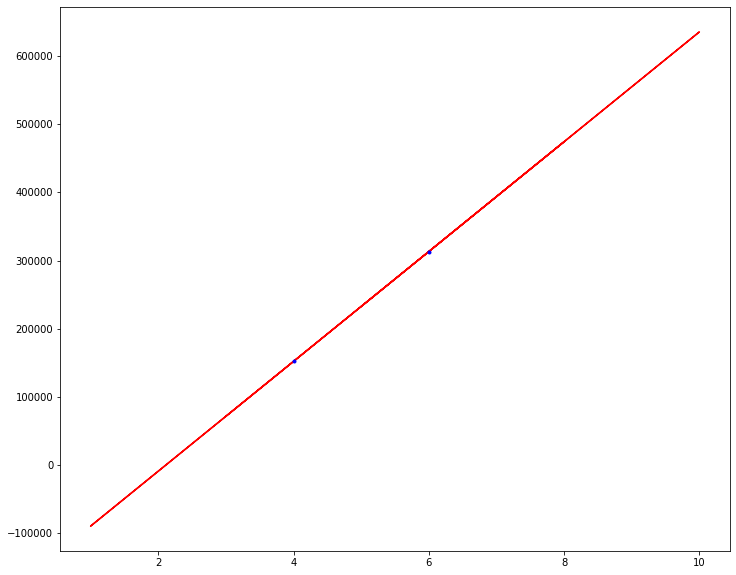

In [ ]:
#Your code here
df = pd.read_csv('position_salaries.csv')
X = df['Level']
t = df['Salary']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

X_train, X_test, t_train, t_test = train_test_split(X,t, test_size=0.2)

X_train_r = X_train.to_numpy().reshape(len(X_train),1)
t_train_r = t_train.to_numpy().reshape(len(t_train),1)

X_test_r = X_test.to_numpy().reshape(len(X_test),1)
t_test_r = t_test.to_numpy().reshape(len(t_test),1)

#Fit a linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train_r, t_train_r)
linear_reg.intercept_, linear_reg.coef_

#Predict using linear regression model
train_predicted = linear_reg.predict(X_train_r)
test_predicted = linear_reg.predict(X_test_r)

#Plot the predictions
plt.plot(X_train_r, train_predicted, "r-")
plt.plot(X_test_r, test_predicted, "b.")
#plt.axis([0, 2, 0, 15]) #x axis range 0 to 2 and y axis range 0 to 15
plt.show()


In [ ]:

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_train_poly_4 = poly_features.fit_transform(X_train_r)
X_test_poly_4 = poly_features.fit_transform(X_test_r)

poly_features = PolynomialFeatures(degree=15, include_bias=False)
X_train_poly_15 = poly_features.fit_transform(X_train_r)
X_test_poly_15 = poly_features.fit_transform(X_test_r)

#print('X_train= ', X_train_r[0])
#print('X_train_poly_4[0]= ', X_train_poly_4[0])
#print('X_train_poly_15[0]= ', X_train_poly_15[0])


Intercept=  [171224.2378806] and coefficients =  [[-197130.85825846   91486.69560607  -15201.78551949     884.31631692]]
Root mean squared error=  14891.490729149673


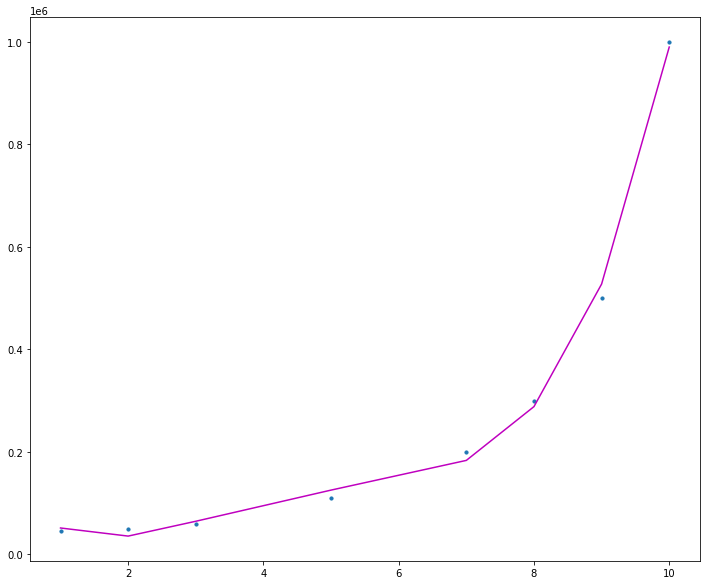

In [ ]:
from sklearn.metrics import mean_squared_error
import operator

# Polynomial of degree 4 
#training data 
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly_4, t_train_r) #Fit the transformed features 
y_poly_pred = lin_reg.predict(X_train_poly_4)  #Letting the model predict the y values for the transformed features to measure the error
rmse = np.sqrt(mean_squared_error(t_train_r,y_poly_pred)) 
print("Intercept= ", lin_reg.intercept_,"and coefficients = " ,lin_reg.coef_)
print("Root mean squared error= ", rmse)


#Plot 
plt.scatter(X_train_r, t_train_r, s=10) 
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train_r,y_poly_pred), key=sort_axis)
X_plot, y_poly_pred_plot = zip(*sorted_zip)
plt.plot(X_plot, y_poly_pred_plot, color='m')
plt.show()

Intercept=  [62498.79649772] and coefficients =  [[ 0.12668445  1.26684451  9.62801826 65.87591439]]
Root mean squared error=  1.0289757937229989e-11


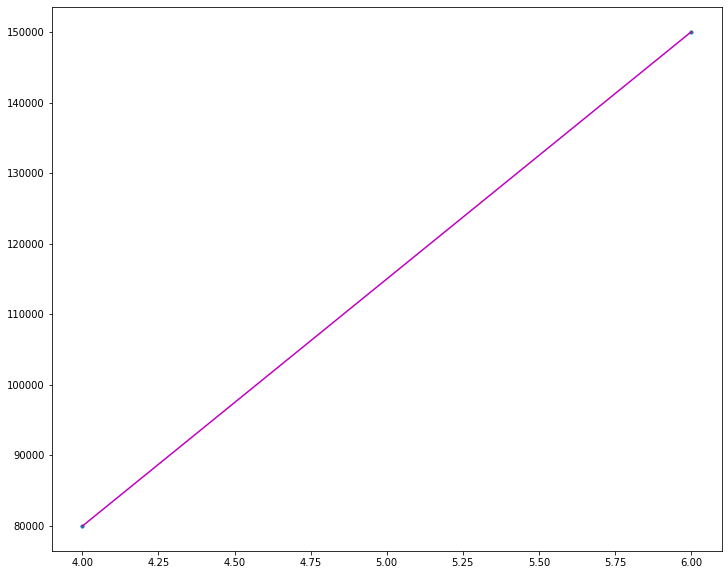

In [ ]:
# Polynomial of degree 4 
#test data 
lin_reg = LinearRegression()
lin_reg.fit(X_test_poly_4, t_test_r) #Fit the transformed features 
y_poly_pred = lin_reg.predict(X_test_poly_4)  #Letting the model predict the y values for the transformed features to measure the error
rmse = np.sqrt(mean_squared_error(t_test_r,y_poly_pred)) 
print("Intercept= ", lin_reg.intercept_,"and coefficients = " ,lin_reg.coef_)
print("Root mean squared error= ", rmse)


#Plot 
plt.scatter(X_test_r, t_test_r, s=10) 
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_test_r,y_poly_pred), key=sort_axis)
X_plot, y_poly_pred_plot = zip(*sorted_zip)
plt.plot(X_plot, y_poly_pred_plot, color='m')
plt.show()

Intercept=  [44892.61857605] and coefficients =  [[ 8.22559763e-01  2.41182208e+00  5.24596163e+00  1.00589922e+01
   1.74302072e+01  2.66690663e+01  3.33652908e+01  2.71678717e+01
  -9.45452260e-01 -2.65755590e+01  1.48340019e+01 -3.50280680e+00
   4.23716868e-01 -2.58849596e-02  6.34356939e-04]]
Root mean squared error=  0.013547923216660866


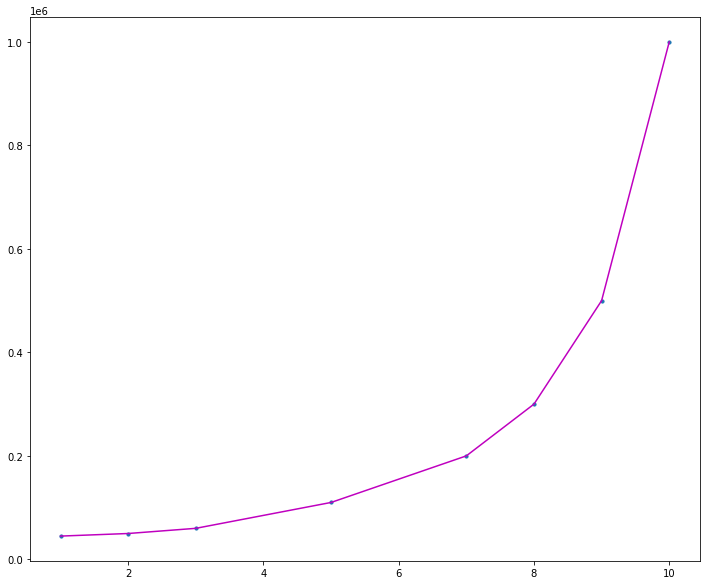

In [ ]:
# Polynomial of degree 15

#training data 
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly_15, t_train_r) #Fit the transformed features 
y_poly_pred = lin_reg.predict(X_train_poly_15)  #Letting the model predict the y values for the transformed features to measure the error
rmse = np.sqrt(mean_squared_error(t_train_r,y_poly_pred)) 
print("Intercept= ", lin_reg.intercept_,"and coefficients = " ,lin_reg.coef_)
print("Root mean squared error= ", rmse)


#Plot 
plt.scatter(X_train_r, t_train_r, s=10) 
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train_r,y_poly_pred), key=sort_axis)
X_plot, y_poly_pred_plot = zip(*sorted_zip)
plt.plot(X_plot, y_poly_pred_plot, color='m')
plt.show()

Intercept=  [79837.45346244] and coefficients =  [[6.18572280e-19 6.18544133e-18 4.70093541e-17 3.21642949e-16
  2.08820499e-15 1.31626192e-14 8.15092717e-14 4.99189857e-13
  3.03567605e-12 1.83762039e-11 1.10905814e-10 6.68029247e-10
  4.01855293e-09 2.41528274e-08 1.45083004e-07]]
Root mean squared error=  2.300859821966427e-11


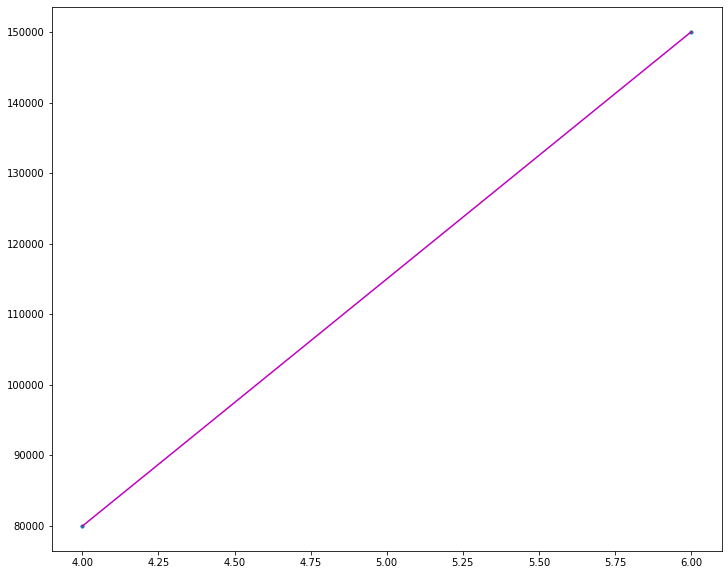

In [ ]:
# Polynomial of degree 15
#test data 
lin_reg = LinearRegression()
lin_reg.fit(X_test_poly_15, t_test_r) #Fit the transformed features 
y_poly_pred = lin_reg.predict(X_test_poly_15)  #Letting the model predict the y values for the transformed features to measure the error
rmse = np.sqrt(mean_squared_error(t_test_r,y_poly_pred)) 
print("Intercept= ", lin_reg.intercept_,"and coefficients = " ,lin_reg.coef_)
print("Root mean squared error= ", rmse)


#Plot 
plt.scatter(X_test_r, t_test_r, s=10) 
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_test_r,y_poly_pred), key=sort_axis)
X_plot, y_poly_pred_plot = zip(*sorted_zip)
plt.plot(X_plot, y_poly_pred_plot, color='m')
plt.show()

#Task 4 [2 points]

1. Read the attached admission data. **[0.25 P]**
2. Split the data into features and label. **[0.25 P]**
3. Split the data into train and test with test size= 0.2 **[0.25 P]**
4. Standardize the data (X_train and X_test) **[0.5 P]**
5. Fit a linear regression model. **[ 0.5 P]**
6. Print the mean squared error value. **[0.25 P]**



In [ ]:
import pandas as pd
df = pd.read_csv('Admission_Predict.csv')


#Bonus [0.25 P]

**Which of the following statements is true about outliers in Linear regression and why?**

A) Linear regression is sensitive to outliers

B) Linear regression is not sensitive to outliers